# Problem Statement: Predicting Credit Card Fraud
## This Data has been collected from UCI Machine Learning Repository.Purpose of the Problem Statement is to find the Default Customers i.e (Model Should Have High Recall).

In [220]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [221]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [222]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [223]:
# Putting feature variable to X
X = df.drop('default.payment.next.month',axis=1)

# Putting response variable to y
y = df['default.payment.next.month']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [224]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [225]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [226]:
# Making predictions
predictions = rfc.predict(X_test)

In [227]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [228]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7058
           1       0.65      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [229]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6673  385]
 [1239  703]]


In [230]:
print(accuracy_score(y_test,predictions))

0.8195555555555556


In [231]:
# Renaming Columns into more understandable/user-friendly terms

# SEX changed to GENDER
# PAY_0 changed to PAY_1
# default.payment.next.month is too long and changed to something simplier, DEFAULT
df.rename(columns={'SEX':'GENDER',
                   'PAY_0':'PAY_1',
                   'default.payment.next.month':'DEFAULT',} , inplace=True)

df.drop('ID', axis=1, inplace=True) # Drop column ID

df.info()  # we see that we have 30,000 observations and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   GENDER     30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [232]:
# We inspect the data as a whole|
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [233]:
sum_column = df["PAY_1"] + df["PAY_2"]+ df["PAY_3"]+ df["PAY_4"]+ df["PAY_5"]+ df["PAY_6"]
df['pay_sum'] = sum_column
bill_sum = df["BILL_AMT1"]+df["BILL_AMT2"]+df["BILL_AMT3"]+df["BILL_AMT4"]+df["BILL_AMT5"]+df["BILL_AMT6"]
df["bill_sum"]=bill_sum
pay_amt = df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
df["pay_amt_sum"]=pay_amt

In [234]:
print('Education Column Values: ', df['EDUCATION'].unique())

Education Column Values:  [2 1 3 5 4 6 0]


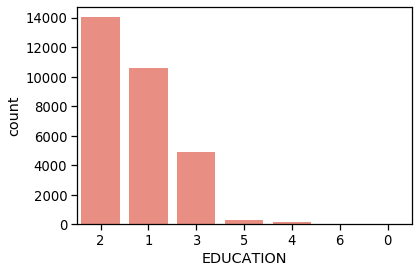

In [235]:
 fig, ax = plt.subplots()
sns.countplot(data=df,x='EDUCATION', order = df['EDUCATION'].value_counts().index, color='salmon')

In [236]:
 df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [237]:
# There exists values 0, 5 and 6 in this column.
# Since these are unknown (undefined), they can be grouped into the category 4: "Others"

df['EDUCATION'] = df['EDUCATION'].apply(lambda edu_value: edu_value 
                                        if ((edu_value > 0 and edu_value < 4)) 
                                        else 4) # Changes every value of x not within (and inclusive of) 1 ~ 3 to 4  

# Corrected changes
df['EDUCATION'].unique()

array([2, 1, 3, 4])

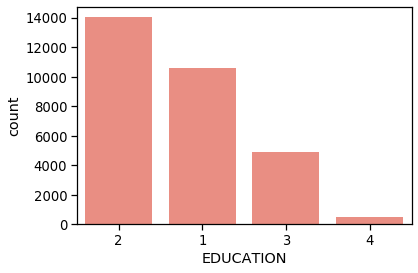

In [238]:
# Being fancy again
fig, ax = plt.subplots()
sns.countplot(data=df,x='EDUCATION', order = df['EDUCATION'].value_counts().index, color='salmon');
# df['EDUCATION'].value_counts().plot(kind='bar', );

In [239]:
print("Marriage Column Values: ", df['MARRIAGE'].unique())

Marriage Column Values:  [1 2 3 0]


In [240]:
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda marriage_value: marriage_value
                                     if (marriage_value > 0 and marriage_value < 3)
                                     else 3) # changes every value of x not within (and inclusive of) 1 and 2 to 3

# Corrected changes
df['MARRIAGE'].unique()

array([1, 2, 3])

In [241]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [242]:
def func(x):
    if(x >=20 and x<30 ):
        return 1
    elif(x>=30 and x<40):
        return 2
    elif(x>=40 and x<50):
        return 3
    elif(x>=50 and x<60):
        return 4
    elif(x>=60 and x<=80):
        return 5

In [243]:
df['AGE'] = df['AGE'].apply(func)


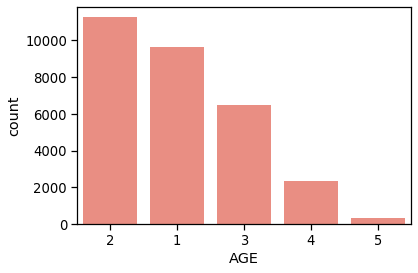

In [244]:
# Being fancy again
fig, ax = plt.subplots()
sns.countplot(data=df,x='AGE', order = df['AGE'].value_counts().index, color='salmon');
# df['EDUCATION'].value_counts().plot(kind='bar', );

In [245]:
# Creating a new dataframe with just the categorical explanatory variables
df_categorical = df[['GENDER', 'EDUCATION', 'MARRIAGE','AGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
                     ,'DEFAULT']]

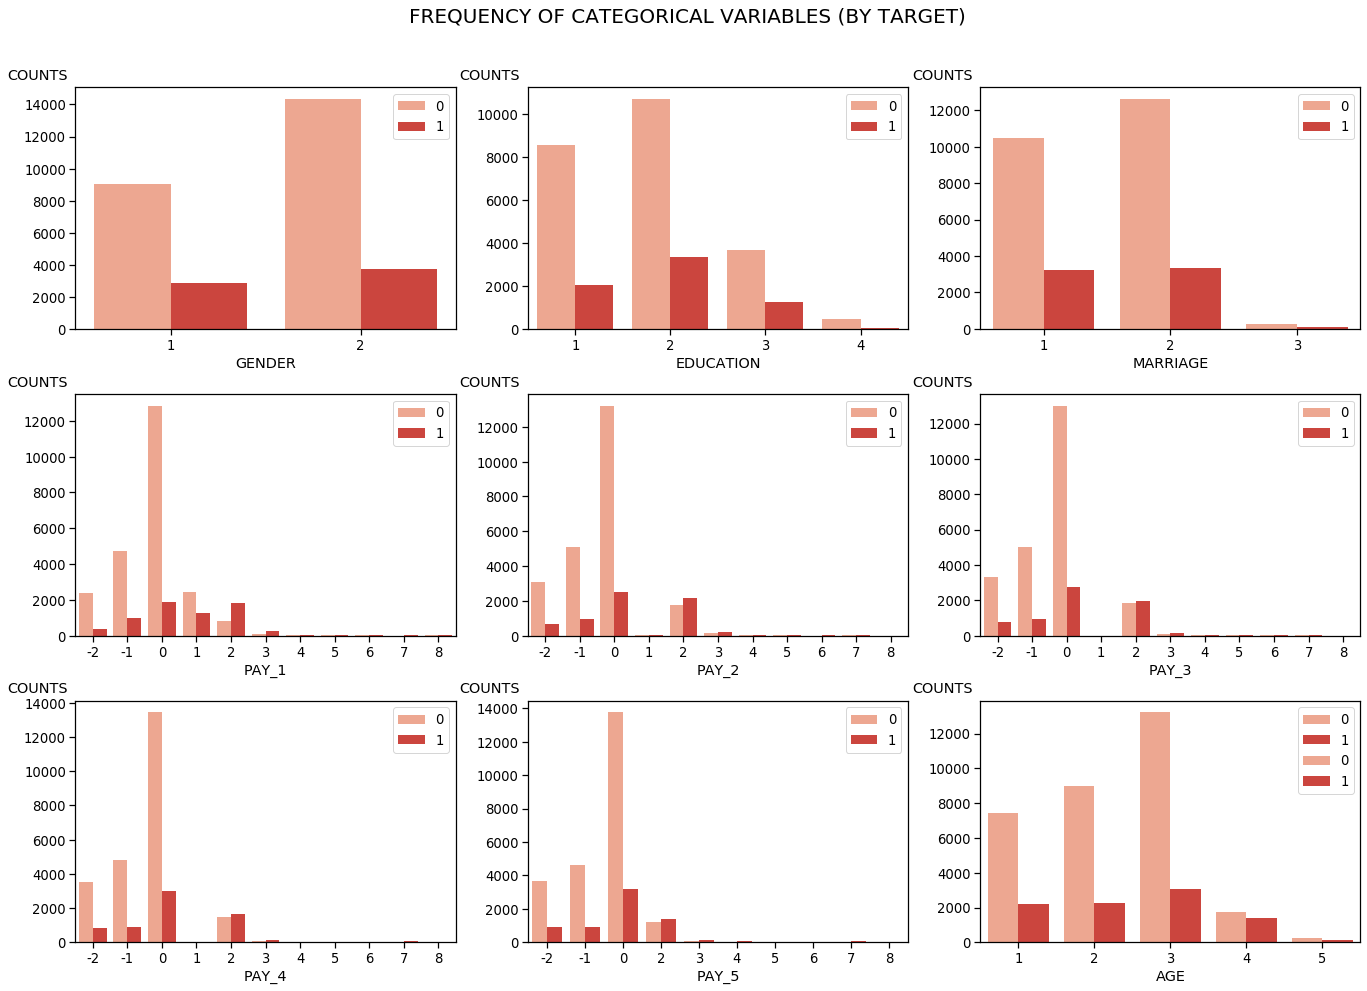

In [246]:
f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle("FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)",size=20)

# Creating plots of each categorical variable to target 
ax1 = sns.countplot(x='GENDER', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[0,0])
ax2 = sns.countplot(x='EDUCATION', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[0,1])
ax3 = sns.countplot(x='MARRIAGE', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[0,2])
ax4 = sns.countplot(x='PAY_1', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[1,0])
ax5 = sns.countplot(x='PAY_2', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[1,1])
ax6 = sns.countplot(x='PAY_3', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[1,2])
ax7 = sns.countplot(x='PAY_4', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,0])
ax8 = sns.countplot(x='PAY_5', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,1])
ax9 = sns.countplot(x='PAY_6', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,2])
ax10 = sns.countplot(x='AGE', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,2])
# Setting legends to upper right
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")
ax6.legend(loc="upper right")
ax7.legend(loc="upper right")
ax8.legend(loc="upper right")
ax9.legend(loc="upper right")
ax10.legend(loc="upper right")
# Changing ylabels to horizontal and changing their positions
ax1.set_ylabel('COUNTS', rotation=0, labelpad=40)  # Labelpad adjusts distance of the title from the graph
ax1.yaxis.set_label_coords(-0.1,1.02)              # (x, y)
ax2.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax2.yaxis.set_label_coords(-0.1,1.02)
ax3.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax3.yaxis.set_label_coords(-0.1,1.02)
ax4.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax4.yaxis.set_label_coords(-0.1,1.02)
ax5.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax5.yaxis.set_label_coords(-0.1,1.02)
ax6.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax6.yaxis.set_label_coords(-0.1,1.02)
ax7.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax7.yaxis.set_label_coords(-0.1,1.02)
ax8.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax8.yaxis.set_label_coords(-0.1,1.02)
ax9.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax9.yaxis.set_label_coords(-0.1,1.02)
ax10.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax10.yaxis.set_label_coords(-0.1,1.02)

# Shifting the Super Title higher
f.tight_layout()  # Prevents graphs from overlapping with each other
f.subplots_adjust(top=0.9);

In [247]:
# generate binary values using get_dummies
age = pd.get_dummies(df['AGE'], prefix='AGE' )
mr = pd.get_dummies(df['MARRIAGE'], prefix='MARRIAGE' )
ed = pd.get_dummies(df['EDUCATION'],prefix='EDUCATION')
# merge with main df bridge_df on key values
df = df.join(age)
df = df.join(mr)
df= df.join(ed)

In [248]:
df = df.drop(['AGE','MARRIAGE','EDUCATION'],axis=1)

In [249]:
print(df['DEFAULT'].value_counts(),'\n')
print(len(df['DEFAULT']))

0    23364
1     6636
Name: DEFAULT, dtype: int64 

30000


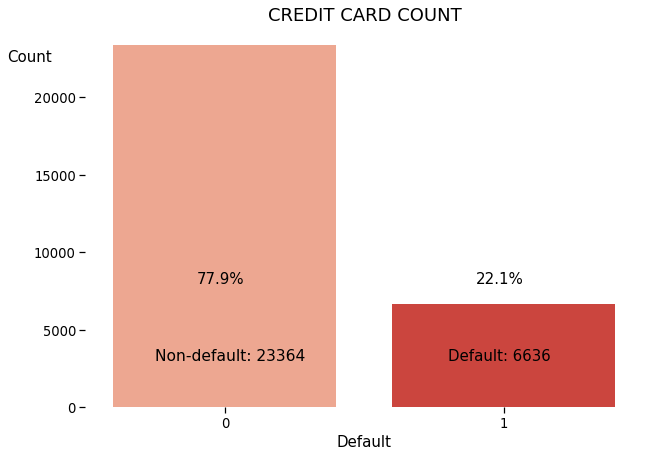

In [250]:
# Frequency of the defaults
default = df['DEFAULT'].sum() # adds up all the default cases in the df
no_default = len(df['DEFAULT']) - default  # entire dataset - default cases

# Percentage of the defaults
default_perc = round(default/len(df['DEFAULT']) * 100, 1)
no_default_perc = round(no_default/len(df['DEFAULT']) * 100, 1)

# Plotting Target
fig, ax = plt.subplots(figsize=(10,7))  # Sets size of graph
sns.set_context('notebook', font_scale=1.2)  # Affects things like size of label, lines and other elements of the plot.

sns.countplot('DEFAULT',data=df, palette="Reds")   
plt.annotate('Non-default: {}'.format(no_default), 
             xy=(-0.25, 3000), # xy = (x dist from 0, y dist from 0)
            size=15.5)

plt.annotate('Default: {}'.format(default), 
             xy=(0.8, 3000), # xy = (x dist from 0, y dist from 0)
            size=15)
plt.annotate('{}%'.format(no_default_perc), xy=(-0.1, 8000),size=15)
plt.annotate('{}%'.format(default_perc), xy=(0.9, 8000),size=15)
plt.title('CREDIT CARD COUNT', size=18)
plt.xlabel("Default",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40, # Adjusts distance of the title from the graph
           size=15)
ax.yaxis.set_label_coords(-0.1,.9)

plt.box(False)        # Removes the bounding area
plt.savefig('target_skew.png', transparent = True)

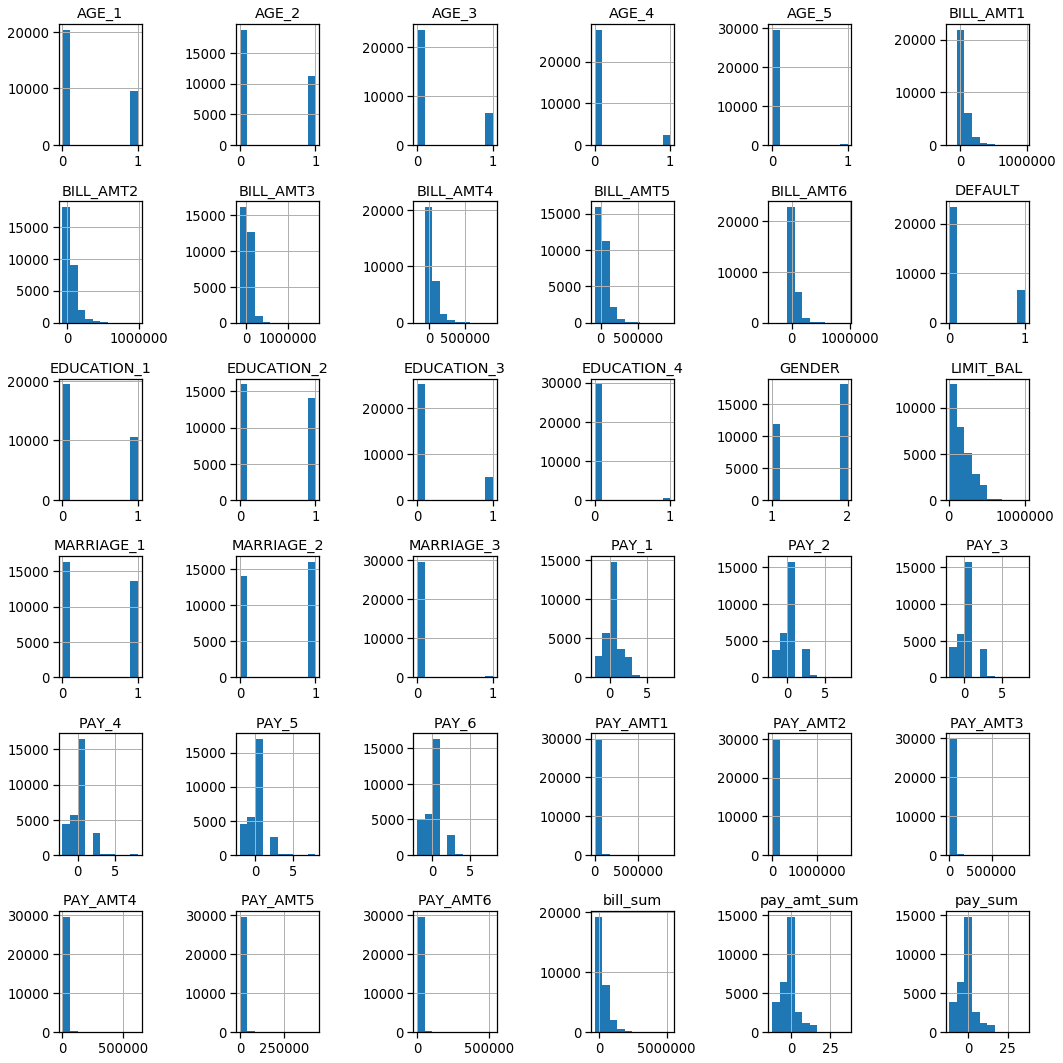

In [251]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

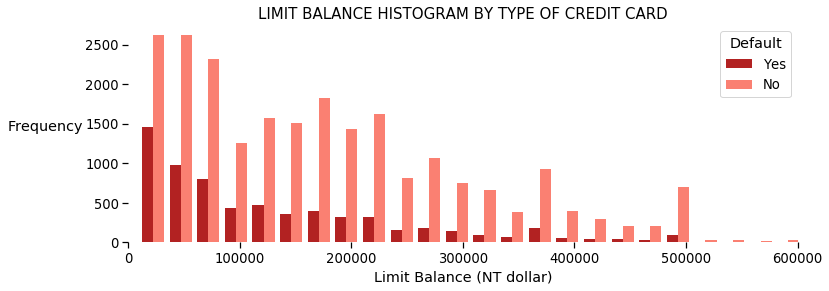

In [252]:
# Can we infer more? what about the columns for lIMIT_BALANCE?
x1 = list(df[df['DEFAULT'] == 1]['LIMIT_BAL'])
x2 = list(df[df['DEFAULT'] == 0]['LIMIT_BAL'])

fig2, ax_lim_bal = plt.subplots(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, normed=False, color=['firebrick', 'salmon'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency', rotation=0,labelpad=40)
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

In [253]:
df

,LIMIT_BAL,GENDER,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,AGE_3,AGE_4,AGE_5,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000.0,2,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0,0,0,1,0,0,0,1,0,0
1,120000.0,2,-1,2,0,0,0,2,2682.0,1725.0,...,0,0,0,0,1,0,0,1,0,0
2,90000.0,2,0,0,0,0,0,0,29239.0,14027.0,...,0,0,0,0,1,0,0,1,0,0
3,50000.0,2,0,0,0,0,0,0,46990.0,48233.0,...,0,0,0,1,0,0,0,1,0,0
4,50000.0,1,-1,0,-1,0,0,0,8617.0,5670.0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,0,0,0,0,0,0,188948.0,192815.0,...,0,0,0,1,0,0,0,0,1,0
29996,150000.0,1,-1,-1,-1,-1,0,0,1683.0,1828.0,...,1,0,0,0,1,0,0,0,1,0
29997,30000.0,1,4,3,2,-1,0,0,3565.0,3356.0,...,0,0,0,0,1,0,0,1,0,0
29998,80000.0,1,1,-1,0,0,0,-1,-1645.0,78379.0,...,1,0,0,1,0,0,0,0,1,0


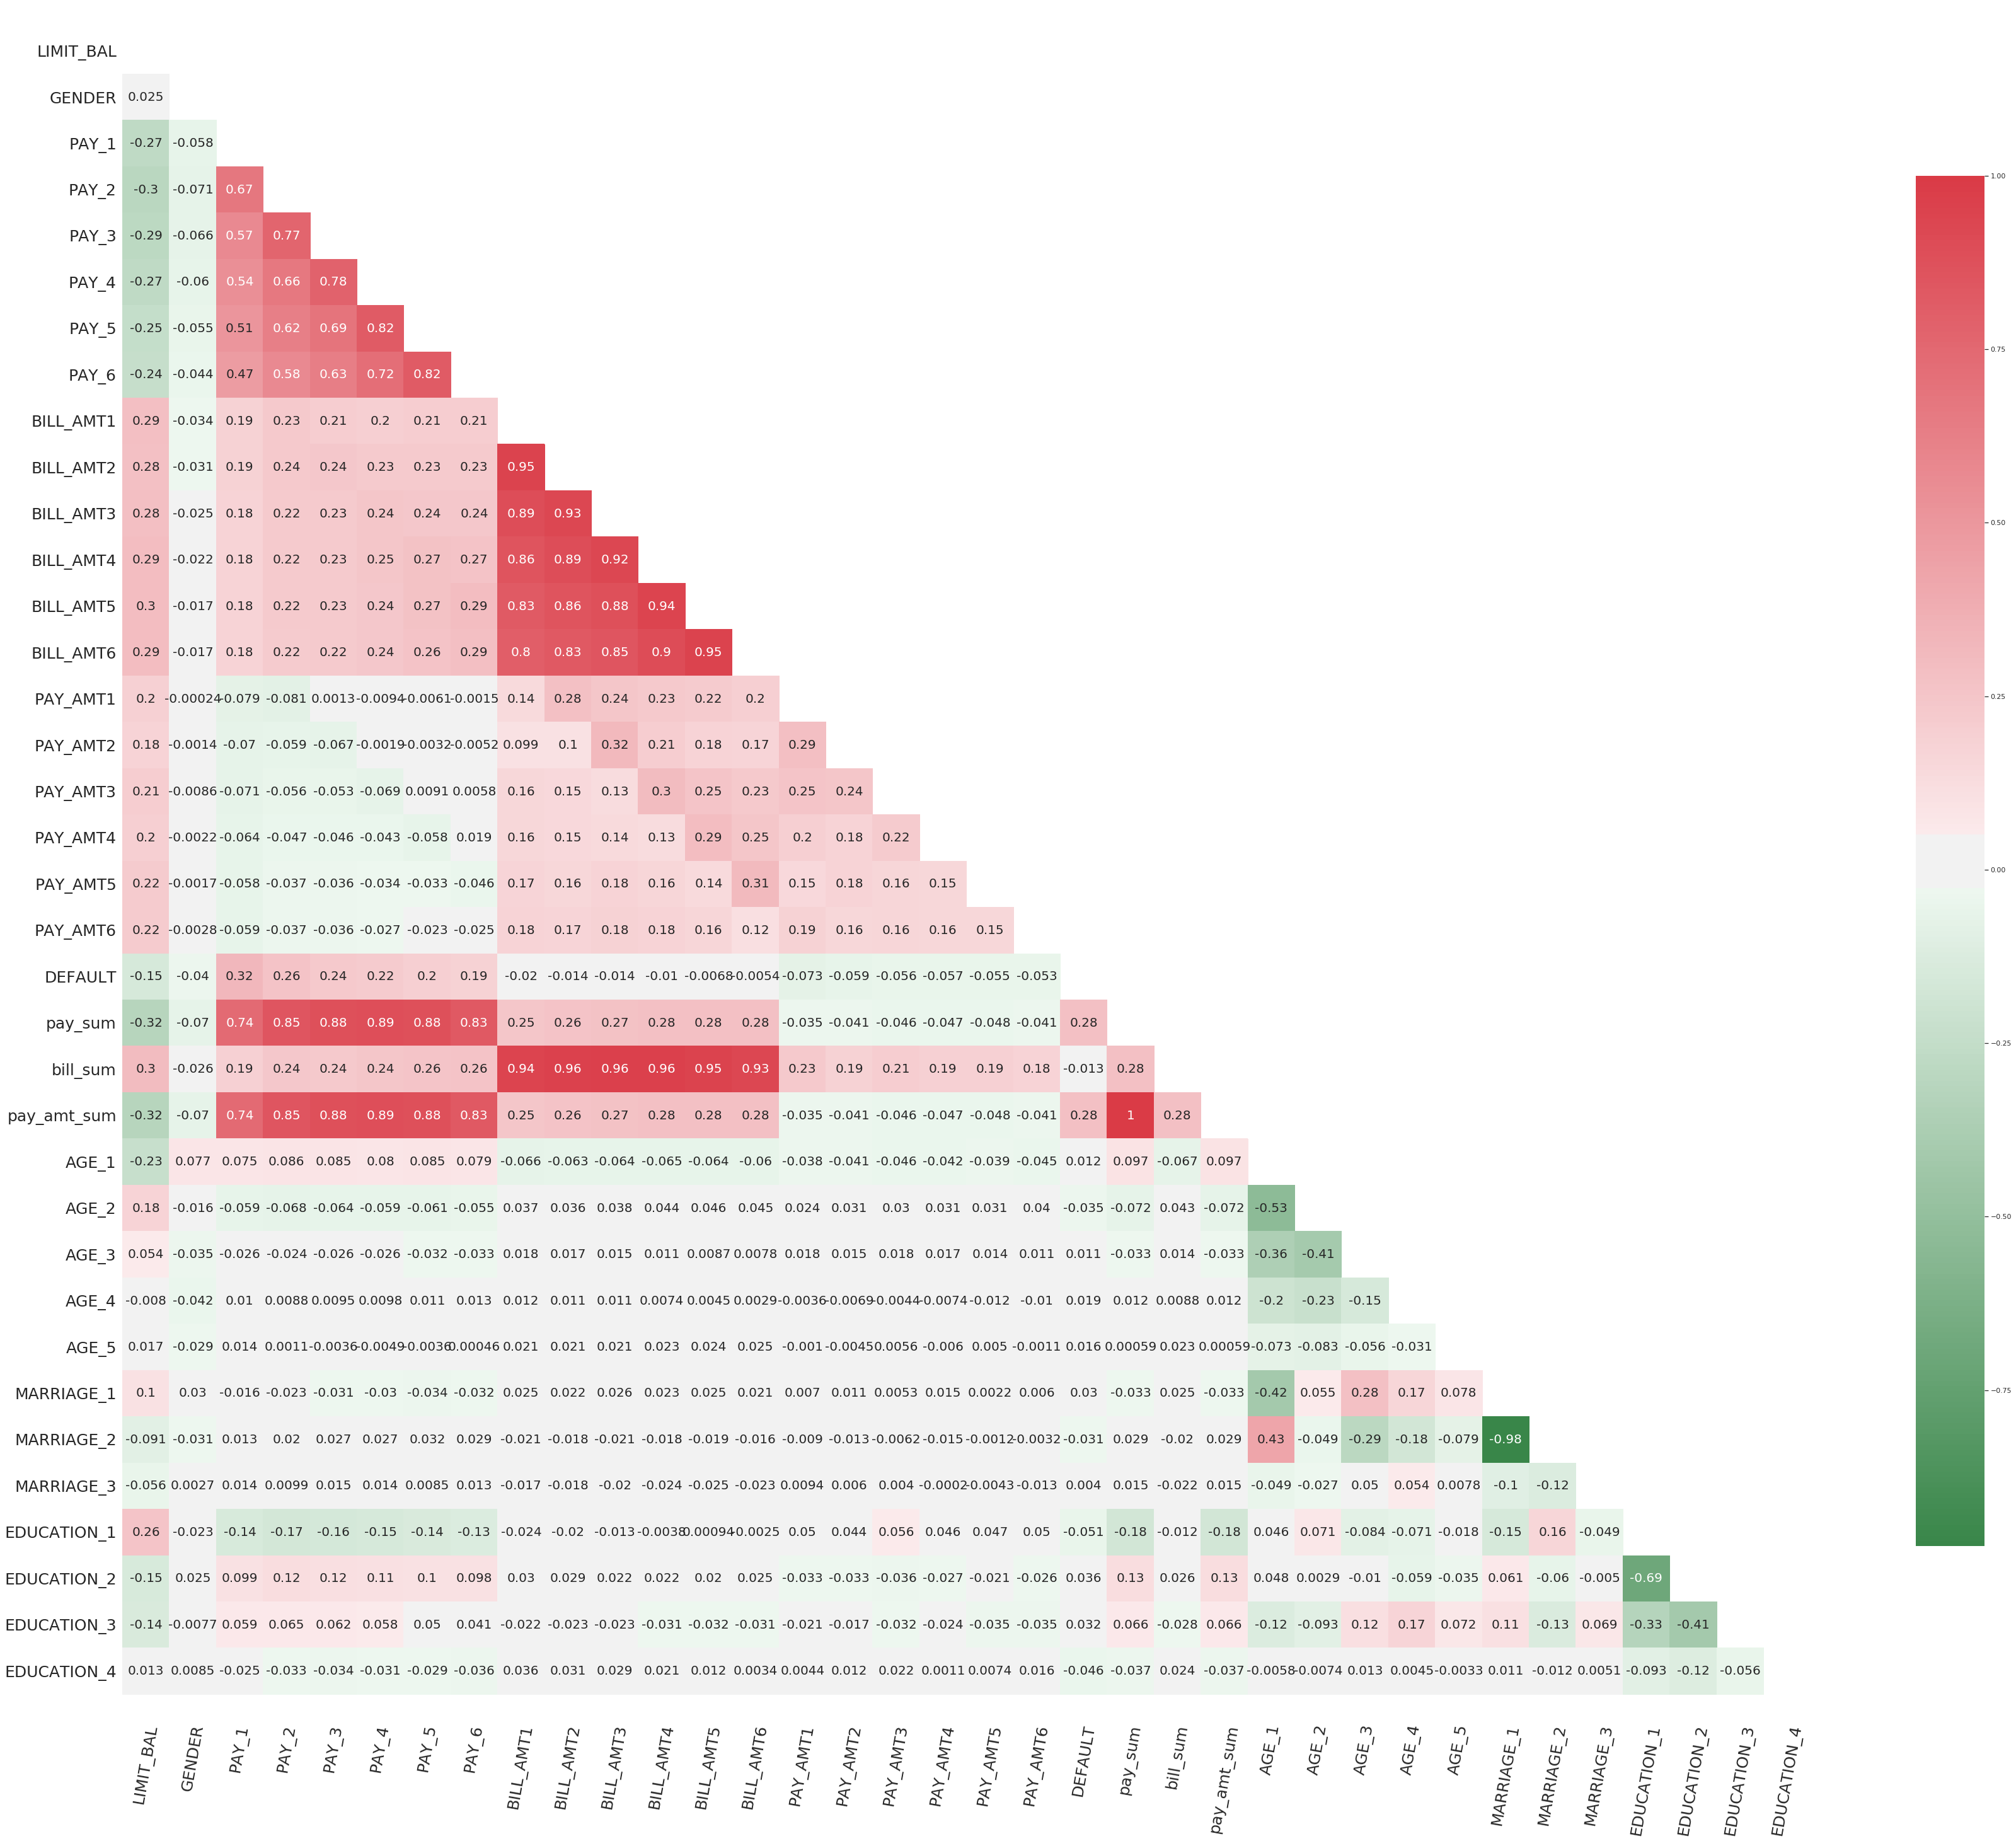

In [254]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

plt.savefig('correlation_heatmap.png', transparent = True)

In [266]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [267]:
column_index(data,['DEFAULT'])

array([20])

In [299]:
df_default_corrs = data.filter(like='DEFAULT')

In [300]:
df_default_corrs

,DEFAULT
LIMIT_BAL,-0.153520
GENDER,-0.039961
PAY_1,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149
PAY_6,0.186866
BILL_AMT1,-0.019644
BILL_AMT2,-0.014193


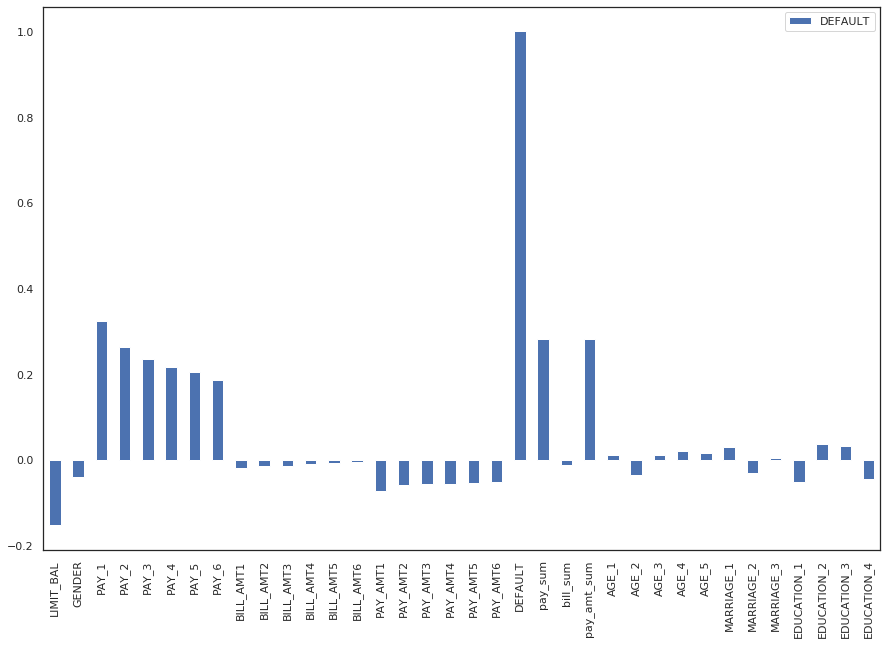

In [301]:
df_default_corrs.plot(kind='bar',figsize=(15,10))

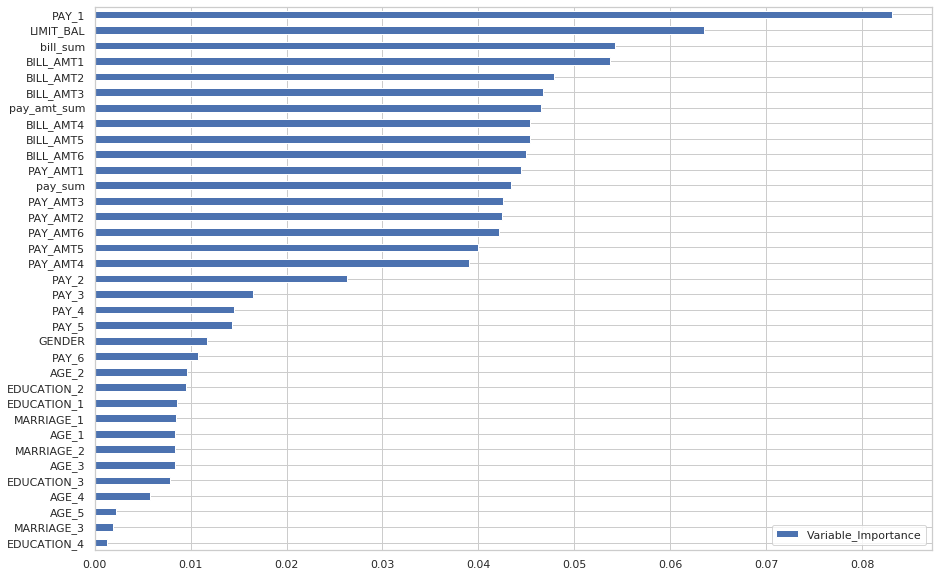

In [302]:
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)
y = df['DEFAULT']

# Data splitting for 80% Train/Val and 20% Test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=69) # 20% holdout 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state=69) # Train/Val

# Initializing the scaler  (Just scale every single time lol)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train_val.values)

## Scale the Predictors on the train/val dataset
X_train_val_scaled = std.transform(X_train_val.values) 

## This line instantiates the model. 
rf = RandomForestClassifier() 

## Fit the model on your training data.
rf.fit(X_train_val_scaled, y_train_val) 

# Obtain the feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Variable_Importance']).sort_values('Variable_Importance',ascending=True)

# Set seaborn contexts 
sns.set(style="whitegrid")

feature_importance.plot.barh(figsize=(15,10))

In [304]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Classifier Metrics 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score

# Pre-processing packages
from sklearn.preprocessing import StandardScaler


# CV, Gridsearch, train_test_split, model selection packages
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split


In [305]:
## Baseline model performance evaluation

# to give model baseline report with cross-validation in dataframe 
def baseline_report_cv_(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
#     # Splitting the training data into 60% training data and 20% validation data.
#     X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
     
    # Creating a shuffled kfold of 5
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    accuracy     = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='roc_auc'))
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)
y = df['DEFAULT']

# to concat all models
df_models = pd.concat([baseline_report_cv_(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_no_scale = df_models.drop('index', axis=1)
df_models_no_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.401333,0.250850,0.862539,0.388584,0.684804,0
1,LogisticRegression,0.779292,0.000000,0.000000,0.000000,0.653256,0
2,KNN,0.749417,0.365900,0.184808,0.245408,0.602765,0
3,DecisionTree,0.728958,0.387028,0.411233,0.402581,0.614343,0
4,RandomForest,0.814167,0.642260,0.365823,0.463552,0.759813,0
5,LinearSVC,0.693125,0.391901,0.395220,0.343397,0.558915,0


In [306]:
## Scaled Dataset Model performance evaluation

# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)
y = df['DEFAULT']

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)


# to concat all models
df_models = pd.concat([baseline_report_cv_(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale = df_models.drop('index', axis=1)
df_models_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.744333,0.440545,0.586582,0.503037,0.730924,0
1,LogisticRegression,0.809917,0.710685,0.235023,0.352953,0.722266,0
2,KNN,0.790583,0.543640,0.316188,0.399745,0.695618,0
3,DecisionTree,0.726292,0.390163,0.405381,0.398569,0.613574,0
4,RandomForest,0.814458,0.641492,0.368753,0.464393,0.760807,0
5,LinearSVC,0.800750,0.722481,0.165542,0.264995,0.718825,0


In [315]:
## SMOTE Dataset model performance evaluation
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Smote with no scaling with cross-validation in dataframe 
def baseline_report_cv_smote(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model, SMOTE's the data
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    from imblearn.over_sampling import SMOTE # Allows for smoting if you forget to initialize it before running func
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    
    #this helps with the way kf will generate indices below
    X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
    
    
    # Creating a shuffled kfold of 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    clf_model_acc_scores_cv = []
    clf_model_precision_scores_cv = []
    clf_model_recall_scores_cv = []
    clf_model_f1_scores_cv = []
    clf_model_rocauc_scores_cv = []
    
    # Manual Cross-Validation
    for train_ind, val_ind in kf.split(X_train_val, y_train_val):

        # Assigning train and validation values for an individual fold
        X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
        X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 

        # Creating the SMOTE data
        X_smoted, y_smoted = SMOTE(random_state=69).fit_sample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_smoted, y_smoted) # Train model on SMOTE'd data
        y_pred = clf_model.predict(X_val)  # Y pred after testing on validation data split
        
        # Save scores of model
        clf_model_acc_score = accuracy_score(y_val, y_pred)
        clf_model_precision_score = precision_score(y_val, y_pred)
        clf_model_recall_score = recall_score(y_val, y_pred)
        clf_model_f1_score = f1_score(y_val, y_pred)   
        clf_model_rocauc_score = roc_auc_score(y_val, y_pred)
        
        # Append scores of model their scoring lists
        clf_model_acc_scores_cv.append(clf_model_acc_score)
        clf_model_precision_scores_cv.append(clf_model_precision_score)
        clf_model_recall_scores_cv.append(clf_model_recall_score)
        clf_model_f1_scores_cv.append(clf_model_f1_score)
        clf_model_rocauc_scores_cv.append(clf_model_rocauc_score)
        

    
    accuracy     = np.mean(clf_model_acc_scores_cv)
    precision    = np.mean(clf_model_precision_scores_cv)
    recall       = np.mean(clf_model_recall_scores_cv)
    f1score      = np.mean(clf_model_f1_scores_cv)
    rocauc       = np.mean(clf_model_rocauc_scores_cv)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()


# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)
y = df['DEFAULT']

# to concat all models
df_models = pd.concat([baseline_report_cv_smote(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_smote(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_smote(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_smote(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_smote(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_smote(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_no_scale_cv_smote = df_models.drop('index', axis=1)
df_models_no_scale_cv_smote

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.328458,0.238523,0.932307,0.379801,0.544896,0
1,LogisticRegression,0.686292,0.313541,0.354339,0.332556,0.567246,0
2,KNN,0.597958,0.281857,0.530604,0.367993,0.573836,0
3,DecisionTree,0.718083,0.373659,0.411145,0.391398,0.608059,0
4,RandomForest,0.809417,0.603850,0.396036,0.478289,0.661252,0
5,LinearSVC,0.568125,0.344657,0.359506,0.208908,0.494725,0


In [316]:
## Oversample Dataset model performance evaluation

def baseline_report_cv_oversampling(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model, oversamples the data
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Allows for oversampling if you forget to initialize it before running func
    from imblearn.over_sampling import RandomOverSampler
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    
    #this helps with the way kf will generate indices below
    X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
    
    
    # Creating a shuffled kfold of 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    clf_model_acc_scores_cv = []
    clf_model_precision_scores_cv = []
    clf_model_recall_scores_cv = []
    clf_model_f1_scores_cv = []
    clf_model_rocauc_scores_cv = []
    
    # Manual Cross-Validation
    for train_ind, val_ind in kf.split(X_train_val, y_train_val):

        # Assigning train and validation values for an individual fold
        X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
        X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 

        # Creating the OverSampled data
        X_resampled, y_resampled = RandomOverSampler(random_state=69).fit_sample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_resampled, y_resampled) # Train model on SMOTE'd data
        y_pred = clf_model.predict(X_val)  # Y pred after testing on validation data split
        
        # Save scores of model
        clf_model_acc_score = accuracy_score(y_val, y_pred)
        clf_model_precision_score = precision_score(y_val, y_pred)
        clf_model_recall_score = recall_score(y_val, y_pred)
        clf_model_f1_score = f1_score(y_val, y_pred)   
        clf_model_rocauc_score = roc_auc_score(y_val, y_pred)
        
        # Append scores of model their scoring lists
        clf_model_acc_scores_cv.append(clf_model_acc_score)
        clf_model_precision_scores_cv.append(clf_model_precision_score)
        clf_model_recall_scores_cv.append(clf_model_recall_score)
        clf_model_f1_scores_cv.append(clf_model_f1_score)
        clf_model_rocauc_scores_cv.append(clf_model_rocauc_score)
        
   
    accuracy     = np.mean(clf_model_acc_scores_cv)
    precision    = np.mean(clf_model_precision_scores_cv)
    recall       = np.mean(clf_model_recall_scores_cv)
    f1score      = np.mean(clf_model_f1_scores_cv)
    rocauc       = np.mean(clf_model_rocauc_scores_cv)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)  
y = df['DEFAULT']

# to concat all models
df_models = pd.concat([baseline_report_cv_oversampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_oversampling(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_oversampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_oversampling(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_oversampling(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_oversampling(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_no_scale_oversampled = df_models.drop('index', axis=1)
df_models_no_scale_oversampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.331625,0.239089,0.930035,0.380336,0.546103,0
1,LogisticRegression,0.692542,0.318425,0.344321,0.330563,0.567658,0
2,KNN,0.592083,0.277002,0.527332,0.363126,0.568859,0
3,DecisionTree,0.725833,0.381475,0.391160,0.386072,0.605926,0
4,RandomForest,0.807958,0.588376,0.430645,0.497258,0.672707,0
5,LinearSVC,0.422083,0.207769,0.586250,0.305873,0.481264,0


In [319]:
## Undersample Dataset model performance evaluation


def baseline_report_cv_undersampling(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model, undersamples the data
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Allows for undersampling if you forget to initialize it before running func
    from imblearn.under_sampling import RandomUnderSampler
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    
    #this helps with the way kf will generate indices below
    X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)
    
    
    # Creating a shuffled kfold of 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    clf_model_acc_scores_cv = []
    clf_model_precision_scores_cv = []
    clf_model_recall_scores_cv = []
    clf_model_f1_scores_cv = []
    clf_model_rocauc_scores_cv = []
    
    # Manual Cross-Validation
    for train_ind, val_ind in kf.split(X_train_val, y_train_val):

        # Assigning train and validation values for an individual fold
        X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
        X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 

        # Creating the UnderSampled data
        X_resampled, y_resampled = RandomUnderSampler(random_state=69).fit_sample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_resampled, y_resampled) # Train model on SMOTE'd data
        y_pred = clf_model.predict(X_val)  # Y pred after testing on validation data split
        
        # Save scores of model
        clf_model_acc_score = accuracy_score(y_val, y_pred)
        clf_model_precision_score = precision_score(y_val, y_pred)
        clf_model_recall_score = recall_score(y_val, y_pred)
        clf_model_f1_score = f1_score(y_val, y_pred)   
        clf_model_rocauc_score = roc_auc_score(y_val, y_pred)
        
        # Append scores of model their scoring lists
        clf_model_acc_scores_cv.append(clf_model_acc_score)
        clf_model_precision_scores_cv.append(clf_model_precision_score)
        clf_model_recall_scores_cv.append(clf_model_recall_score)
        clf_model_f1_scores_cv.append(clf_model_f1_score)
        clf_model_rocauc_scores_cv.append(clf_model_rocauc_score)
        

    
    accuracy     = np.mean(clf_model_acc_scores_cv)
    precision    = np.mean(clf_model_precision_scores_cv)
    recall       = np.mean(clf_model_recall_scores_cv)
    f1score      = np.mean(clf_model_f1_scores_cv)
    rocauc       = np.mean(clf_model_rocauc_scores_cv)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [0]       })   # timetaken for comparison later
    return df_model


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)  
y = df['DEFAULT']

# to concat all models
df_models = pd.concat([baseline_report_cv_undersampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_undersampling(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_undersampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_undersampling(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_undersampling(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_undersampling(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_no_scale_undersample = df_models.drop('index', axis=1)
df_models_no_scale_undersample

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.331292,0.239565,0.933873,0.381223,0.547305,0
1,LogisticRegression,0.687208,0.313924,0.351737,0.331447,0.566856,0
2,KNN,0.571000,0.280935,0.605930,0.383798,0.583497,0
3,DecisionTree,0.617625,0.313406,0.614966,0.415009,0.616733,0
4,RandomForest,0.737208,0.434925,0.639607,0.517731,0.702220,0
5,LinearSVC,0.451625,0.198973,0.633042,0.278309,0.517581,0


In [320]:
## SMOTE Datset with Scaling for Model Performance Evaluation


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)  
y = df['DEFAULT']

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_smote(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_smote(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_smote(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_smote(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_smote(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_smote(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale_cv_smote = df_models.drop('index', axis=1)
df_models_scale_cv_smote

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.477000,0.273467,0.826805,0.410915,0.602294,0
1,LogisticRegression,0.673167,0.365664,0.655575,0.469253,0.666912,0
2,KNN,0.666583,0.349162,0.591606,0.438979,0.639709,0
3,DecisionTree,0.697167,0.352009,0.443743,0.392531,0.606328,0
4,RandomForest,0.800625,0.559146,0.455036,0.501658,0.676759,0
5,LinearSVC,0.675167,0.366717,0.650146,0.468694,0.666257,0


In [321]:
## Oversampling & Scaled Dataset on Model Performance Evaluation

# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)  
y = df['DEFAULT']

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_oversampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_oversampling(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_oversampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_oversampling(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_oversampling(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_oversampling(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale_oversampled = df_models.drop('index', axis=1)
df_models_scale_oversampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.538625,0.296044,0.788511,0.430161,0.627890,0
1,LogisticRegression,0.680958,0.372051,0.648999,0.472785,0.669558,0
2,KNN,0.659500,0.344429,0.601632,0.437967,0.638740,0
3,DecisionTree,0.728000,0.385732,0.393341,0.389234,0.608114,0
4,RandomForest,0.808875,0.592472,0.428668,0.497370,0.672594,0
5,LinearSVC,0.686958,0.376967,0.641778,0.474774,0.670816,0


In [322]:
## Undersampling & Scaled Dataset for model performance evaluation

# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.drop('DEFAULT',axis=1)  
y = df['DEFAULT']

# Creating n_splits for the function since it already has kfold creation in them
n_splits = 5

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_undersampling(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_undersampling(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_undersampling(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_undersampling(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_undersampling(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_undersampling(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale_undersample = df_models.drop('index', axis=1)
df_models_scale_undersample

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.591750,0.321899,0.745452,0.447744,0.646976,0
1,LogisticRegression,0.679750,0.370397,0.645992,0.470671,0.667670,0
2,KNN,0.678583,0.364358,0.613375,0.456937,0.655281,0
3,DecisionTree,0.616500,0.313028,0.617027,0.415177,0.616711,0
4,RandomForest,0.736167,0.433014,0.634391,0.514628,0.699683,0
5,LinearSVC,0.685375,0.374819,0.638433,0.472146,0.668572,0


In [326]:
# All the scores of the models
df_models_no_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.401333,0.250850,0.862539,0.388584,0.684804,0
1,LogisticRegression,0.779292,0.000000,0.000000,0.000000,0.653256,0
2,KNN,0.749417,0.365900,0.184808,0.245408,0.602765,0
3,DecisionTree,0.728958,0.387028,0.411233,0.402581,0.614343,0
4,RandomForest,0.814167,0.642260,0.365823,0.463552,0.759813,0
5,LinearSVC,0.693125,0.391901,0.395220,0.343397,0.558915,0


In [327]:
df_models_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.744333,0.440545,0.586582,0.503037,0.730924,0
1,LogisticRegression,0.809917,0.710685,0.235023,0.352953,0.722266,0
2,KNN,0.790583,0.543640,0.316188,0.399745,0.695618,0
3,DecisionTree,0.726292,0.390163,0.405381,0.398569,0.613574,0
4,RandomForest,0.814458,0.641492,0.368753,0.464393,0.760807,0
5,LinearSVC,0.800750,0.722481,0.165542,0.264995,0.718825,0


In [328]:
df_models_no_scale_cv_smote

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.328458,0.238523,0.932307,0.379801,0.544896,0
1,LogisticRegression,0.686292,0.313541,0.354339,0.332556,0.567246,0
2,KNN,0.597958,0.281857,0.530604,0.367993,0.573836,0
3,DecisionTree,0.718083,0.373659,0.411145,0.391398,0.608059,0
4,RandomForest,0.809417,0.603850,0.396036,0.478289,0.661252,0
5,LinearSVC,0.568125,0.344657,0.359506,0.208908,0.494725,0


In [329]:
df_models_no_scale_oversampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.331625,0.239089,0.930035,0.380336,0.546103,0
1,LogisticRegression,0.692542,0.318425,0.344321,0.330563,0.567658,0
2,KNN,0.592083,0.277002,0.527332,0.363126,0.568859,0
3,DecisionTree,0.725833,0.381475,0.391160,0.386072,0.605926,0
4,RandomForest,0.807958,0.588376,0.430645,0.497258,0.672707,0
5,LinearSVC,0.422083,0.207769,0.586250,0.305873,0.481264,0


In [330]:
df_models_no_scale_undersample

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.331292,0.239565,0.933873,0.381223,0.547305,0
1,LogisticRegression,0.687208,0.313924,0.351737,0.331447,0.566856,0
2,KNN,0.571000,0.280935,0.605930,0.383798,0.583497,0
3,DecisionTree,0.617625,0.313406,0.614966,0.415009,0.616733,0
4,RandomForest,0.737208,0.434925,0.639607,0.517731,0.702220,0
5,LinearSVC,0.451625,0.198973,0.633042,0.278309,0.517581,0


In [331]:
df_models_scale_cv_smote

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.477000,0.273467,0.826805,0.410915,0.602294,0
1,LogisticRegression,0.673167,0.365664,0.655575,0.469253,0.666912,0
2,KNN,0.666583,0.349162,0.591606,0.438979,0.639709,0
3,DecisionTree,0.697167,0.352009,0.443743,0.392531,0.606328,0
4,RandomForest,0.800625,0.559146,0.455036,0.501658,0.676759,0
5,LinearSVC,0.675167,0.366717,0.650146,0.468694,0.666257,0


In [332]:

df_models_scale_oversampled

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.538625,0.296044,0.788511,0.430161,0.627890,0
1,LogisticRegression,0.680958,0.372051,0.648999,0.472785,0.669558,0
2,KNN,0.659500,0.344429,0.601632,0.437967,0.638740,0
3,DecisionTree,0.728000,0.385732,0.393341,0.389234,0.608114,0
4,RandomForest,0.808875,0.592472,0.428668,0.497370,0.672594,0
5,LinearSVC,0.686958,0.376967,0.641778,0.474774,0.670816,0


In [333]:
df_models_scale_undersample

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.591750,0.321899,0.745452,0.447744,0.646976,0
1,LogisticRegression,0.679750,0.370397,0.645992,0.470671,0.667670,0
2,KNN,0.678583,0.364358,0.613375,0.456937,0.655281,0
3,DecisionTree,0.616500,0.313028,0.617027,0.415177,0.616711,0
4,RandomForest,0.736167,0.433014,0.634391,0.514628,0.699683,0
5,LinearSVC,0.685375,0.374819,0.638433,0.472146,0.668572,0


## Conclusion :
## We can Suggest Guassian Navie Bayes as Best Model to Catch the Default Customers.